In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
test = pd.read_csv('test.csv')
test.shape

(116293, 11)

In [2]:
train = pd.read_csv('train.csv')
train.head(2)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0


In [ ]:
train["Date"]=pd.to_datetime(train.Date)

# EDA

What should check:

- (account for structure change) trend from year to year? (cuz test) 
- mosquito species (~all have it?)
- - location of traps catching certain species (-->location of species)
- weather ("hot & dry")
- - seasons of year

NOTE:
It is perhaps 'surprising', but the top achiever in the competition took an approach of predicting based on leaked information (basically managed to identify the authorities prediction' of the virus from their actions & choices (number of checks at certain locations, etc...)), so...?

### Mosquito species

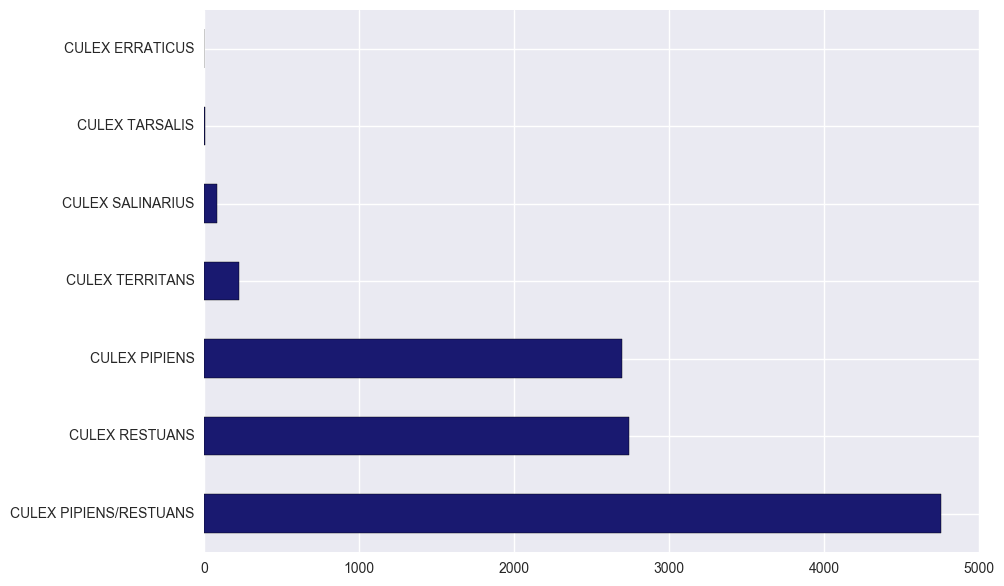

In [6]:
train.Species.value_counts().plot(kind='barh', color='midnightblue', figsize=(10,7))
plt.show()

In [5]:
pd.pivot_table(train, index=['Species'], values=['WnvPresent'], aggfunc=[np.mean,np.sum])

,mean,sum
,WnvPresent,WnvPresent
Species,,
CULEX ERRATICUS,0.000000,0
CULEX PIPIENS,0.088922,240
CULEX PIPIENS/RESTUANS,0.055135,262
CULEX RESTUANS,0.017883,49
CULEX SALINARIUS,0.000000,0
CULEX TARSALIS,0.000000,0
CULEX TERRITANS,0.000000,0


### NumMosquitos over years at each trap

__Ditto, graphed__

In [7]:
len(train.NumMosquitos.apply(lambda x:1))
train.shape

(10506, 12)

In [10]:
plt.figure(figsize=(100,100))
for i, trap in enumerate(list(set(train.Trap))):
    plt.subplot(17,8,i+1) #17 rows & 8 columns is the
    train[train.Trap==trap].set_index('Date', drop=True).NumMosquitos.resample('2A').sum().plot.bar(label="NumMos_"+trap, rot=15)
    #train[train.Trap==trap].set_index('Date', drop=True).NumMosquitos.apply(lambda x:1).resample('2A').sum().plot.bar(label="Records_"+trap, rot=15)
    #amend "Records" plot so that bars for each year are displaced side to side
    plt.legend(loc='upper left',fontsize=20)

Some traps have stopped being checked after certain first years --> most definitely a strategic choice...

(check number of mosquitos against number of records (rows) (IN PROGRESS)

__Stdev across years__

In [151]:
dicty={}
for trap in list(set(train.Trap)):
    temp=train[train.Trap==trap].set_index('Date', drop=True).NumMosquitos.resample('2A').sum()
    dicty[trap]=temp.std()

In [158]:
NumMos_std_over_years=pd.Series(dicty)
NumMos_std_over_years.dropna()

T002    610.071854
T003    190.708329
T008    332.296053
T009    440.695662
T011    121.757614
T012    252.009259
T013    259.239111
T016    296.277741
T017     43.230969
T018     13.793114
T027    160.838428
T028    221.490406
T030    607.237735
T031    221.990052
T033    117.081168
T035     61.000000
T039     71.670543
T043     39.203529
T045    246.780267
T046    129.953838
T047    168.254520
T048    289.784978
T049     29.966648
T054    157.735010
T061    185.714835
T062    139.172255
T063     27.548442
T065    261.905835
T066    260.121766
T069     93.210783
           ...    
T147     65.316537
T148     47.648015
T151    279.525044
T152     57.005848
T153     89.095454
T155    112.387722
T158    474.164792
T159    262.950407
T160     72.546537
T200    390.439496
T209    205.107086
T212    780.348800
T218     47.595518
T220    151.805523
T221    395.628930
T222     22.538855
T223    321.253794
T224    114.378028
T225    480.567720
T226    184.462282
T227    535.834863
T228    287.

__Other unused metrics had constructed (in case need them)__

In [12]:
mean_num=pd.pivot_table(train, values="NumMosquitos", index="Trap")

In [13]:
std_num=pd.pivot_table(train, values="NumMosquitos", index="Trap", aggfunc=np.std)

In [19]:
std_num.sort_values(ascending=False)

Trap
T138     21.351766
T128     20.179749
T212     19.007528
T225     18.225025
T900     18.168964
T215     18.122563
T054C    18.106935
T221     18.011952
T135     17.901798
T103     17.878997
T002     17.740500
T008     17.612939
T115     17.581904
T009     17.581419
T158     17.248527
T903     16.881929
T233     16.641919
T223     16.636112
T030     16.540022
T086     16.275703
T114     16.036413
T231     15.257241
T159     15.124723
T016     14.841297
T227     14.671273
T014     14.085290
T013     13.505811
T048     13.357870
T045     13.260924
T096     13.217428
           ...    
T229      3.380617
T043      3.345064
T146      3.166355
T206      3.080662
T071      3.078885
T005      3.056249
T107      3.006486
T049      2.925068
T142      2.881085
T017      2.876206
T040      2.828427
T007      2.740416
T150      2.703213
T129      2.399713
T156      2.321740
T099      2.231093
T025      2.166174
T075      2.137387
T162      2.129163
T051      2.042408
T219      1.687489
T077   

### Baseline Accuracy

In [4]:
train.WnvPresent.value_counts()/train.shape[0]

0    0.947554
1    0.052446
Name: WnvPresent, dtype: float64

Baseline accuracy is 0.947554%